# Happiness score (Kaggle dataset)
**Context**

Happiness and well-being are essential indicators of societal progress, often influenced by economic conditions such as GDP and inflation. This dataset combines data from the World Happiness Index (WHI) and inflation metrics to explore the relationship between economic stability and happiness levels across 148 countries from 2015 to 2023. By analyzing key economic indicators alongside social well-being factors, this dataset provides insights into global prosperity trends.

*The dataset is created using publicly available data from World Happiness Report, Gallup World Poll, and the World Bank. It has been structured for research, machine learning, and policy analysis purposes.*

**Content**

This dataset is provided in CSV format and includes 16 columns, covering both happiness-related features and economic indicators such as GDP per capita, inflation rates, and corruption perception. The main columns include:

- Happiness Score & Rank (World Happiness Index ranking per country)
- Economic Indicators (GDP per capita, inflation metrics)
- Social Factors (Freedom, Social Support, Generosity)
- Geographical Information (Country & Continent)

**Feature description**

| Column Name                            | Description                                                                 |
|----------------------------------------|-----------------------------------------------------------------------------|
| Country                                | The name of the country where the data was recorded.                        |
| Year                                   | The year in which the data was collected.                                   |
| Headline Consumer Price Inflation      | Overall inflation rate from the Consumer Price Index.                       |
| Energy Consumer Price Inflation        | Inflation rate of energy products like fuel and electricity.                |
| Food Consumer Price Inflation          | Inflation rate of food items, measured via the Consumer Price Index.        |
| Official Core Consumer Price Inflation | Inflation rate excluding food and energy (core index).                      |
| Producer Price Inflation               | Inflation based on prices received by domestic producers (Producer Price Index). |
| GDP deflator Index growth rate         | Growth rate of GDP deflator, measuring overall price change in the economy. |
| Continent/Region                       | The continent or region of the corresponding country.                       |
| Score                                  | Happiness score based on survey responses (higher values imply more happiness). |
| GDP per Capita                         | Economic output per person, normalized across countries.                    |
| Social support                         | Average level of social assistance or emotional support perceived by citizens. |
| Healthy life expectancy at birth       | Normalized estimate of healthy years expected at birth.                     |
| Freedom to make life choices           | Degree to which individuals feel empowered to make life decisions.          |
| Generosity                             | Average level of charitable or altruistic behavior in the country.          |
| Perceptions of corruption              | Public perception of corruption in government and institutions.             |

**Source:** https://www.kaggle.com/datasets/agrafintech/world-happiness-index-and-inflation-dataset



## Selecting and cleaning relevant information

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath = 'data/WHI_Inflation.csv'
happy_raw = pd.read_csv(filepath)

print(happy_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

In [ ]:
# Select variables according to the original WHI, including year and region
selection = [
    'Year', 'Country', 'Continent/Region',
    'GDP per Capita', 'Social support', 'Healthy life expectancy at birth',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
    'Score'
]

happy = happy_raw.loc[:, selection]

# Match the feature names with the ones of dataset used previously
feature_names = [
    'year', 'country', 'region',
    'gdp_per_cap', 'social_support', 'life_exp',
    'freedom', 'generosity', 'corruption',
    'happiness_score'
]

happy.columns = feature_names
print(happy.isna().sum().sort_values(ascending=False))

corruption         1
year               0
country            0
region             0
social_support     0
gdp_per_cap        0
life_exp           0
freedom            0
generosity         0
happiness_score    0
dtype: int64


In [ ]:
# Drop missing values
happy.dropna(inplace=True)
print(happy.isna().sum().sort_values(ascending=False))

year               0
country            0
region             0
gdp_per_cap        0
social_support     0
life_exp           0
freedom            0
generosity         0
corruption         0
happiness_score    0
dtype: int64


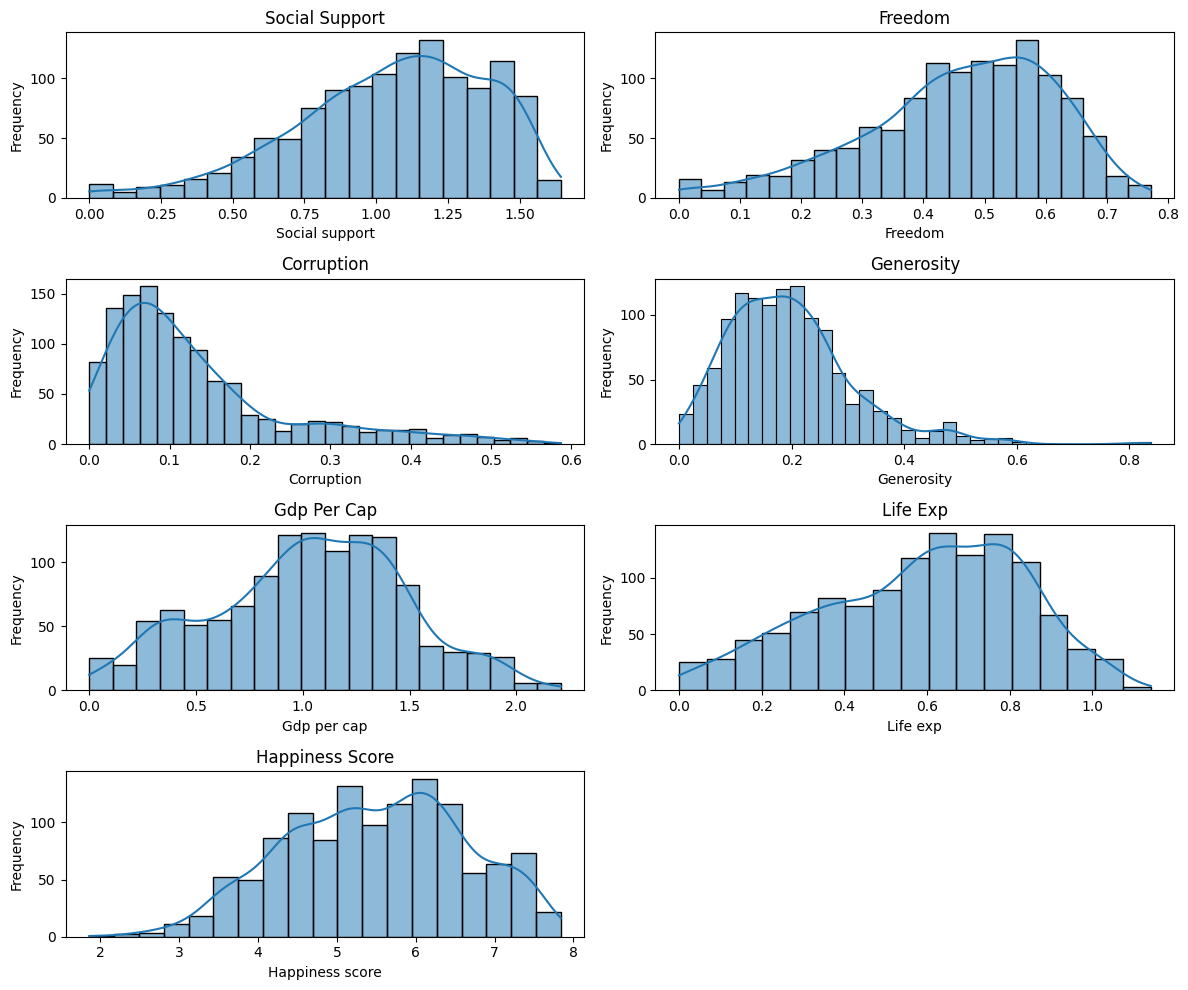

In [ ]:
# Distributions of numerical variables

# Define column names
cols = ['social_support', 'freedom', 'corruption', 'generosity', 'gdp_per_cap', 'life_exp', 'happiness_score']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plot histograms with KDE
for i, col in enumerate(cols):
  sns.histplot(data=happy, x=col, kde=True, ax=axes[i])
  axes[i].set_title(col.replace('_', ' ').title())
  axes[i].set_xlabel(col.replace('_', ' ').capitalize())
  axes[i].set_ylabel('Frequency')

# Hide any unused subplot: the last one
if len(cols) < len(axes):
  fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Normalization techniques
There are different techniques to normalize data. They are used when the ranges across features are different, since they can affect the performance of predicitive modelling. These are some of the main approaches:

- **Linear Scaling:** the distribution of the feature is almost uniform. The method converts floating-point values from their natural range into a standard range —usually 0 to 1 or -1 to +1.
- **Standard Scaling:** the distribution of the feature is almost normal. This method uses the concept of Z-score (standard deviation from the mean), and consists in calculating them from the feature vector.
- **Logarithmic Scaling:** the distribution of the feature is heavy skewed on at least either side of tail. The method computes the logarithm of the raw value. In theory, the logarithm could be any base; in practice, log scaling usually calculates the natural logarithm (ln).

According to the distributions observed in the previous dataset for the same features, the majority of them —excluding GDP per capita and life expectancy— show a uniform-like distribution. The difference in values in those features between datasets could be due to the application of linear normalization. GDP per capita and life expectancy —skewed distributions— could be the result of a logarithmic normalization. Given that the dataset information states that it was created *for research, machine learning and policy analysis purposes*, we can assume that any of the normalization techniques was applied somehow and it explains the difference between values and expected measures.

**Source:** https://developers.google.com/machine-learning/crash-course/numerical-data/normalization

In [ ]:
# Final dataset
happy.to_csv('happy_normalized.csv', index=False)

# Happiness Score
The intention of this notebook is the evaluation of predictive models, through the application of previous techniques used for feature selection and training, in order to predict the happiness score. The main difference is the dataset used —a scaled dataset with more observations.

## New dataset: key differences
- New variables included: region and year.
- More data: the information available in the year variable spans from 2015 to 2023.
- Normalized data that improves the modelling performance.

## Correlations and differences with the previous dataset
The three features with higher correlations are still the same, compared to the previous dataset:

| Feature             | Previous Correlation | Current Correlation |
|---------------------|----------------------|---------------------|
| GDP per Capita      | 0.754                | 0.740               |
| Social Support      | -0.839               | 0.659               |
| Life expectancy     | 0.790                | 0.703               |


An interesting finding is that social support exhibits a positive correlation with the happiness score —a more intuitive relationship.

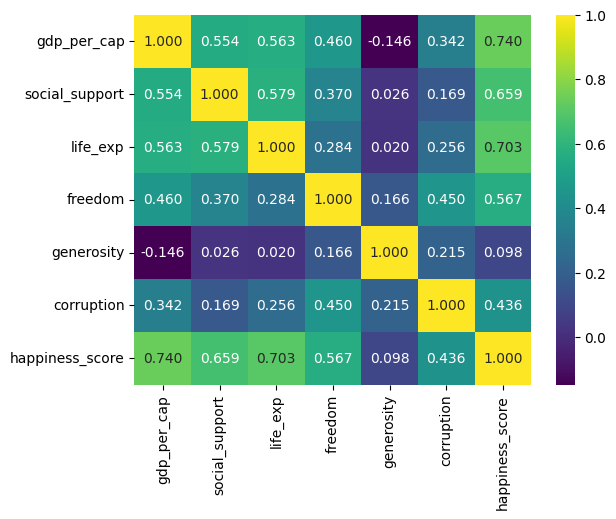

In [ ]:
# Correlations
corr = happy.drop(['country', 'region', 'year'], axis=1).corr()
sns.heatmap(corr, fmt='.3f', annot=True, cmap='viridis')
plt.show()

## Looking for determinants
The approach is the same: fit regressions for each main attribute (based on correlations) as explanatory variables of the happiness score.

### Regression: Happiness Score vs. Social Support
The description of the variables used are the following:

- Social support reflects the national average of responses to a question about the availability of reliable help during times of need.
- Happiness score is an index of subjective well-being derived from responses in a survey.

The initial supposition about the negative relationship observed in the previous dataset was that times of need were less frequent in contexts where the income (measured with GDP per capita) tends to be high, so a person is less likely to ask for help. This explanation was also based on the positive correlation (0.723) between social support and GDP per capita.

However, the correlation between social support and the happiness score is now moderately positive (0.659), which, as mentioned earlier, makes the relationship more intuitive —as social support increases, so does the happiness score.

Key statistics:

Correlation coefficient: 0.659

R² score: Relatively low (0.434), indicating weak explanatory power opposed to the same feature in the previous dataset.

P-value: Significantly low, supporting statistical relevance.

Correlation coefficient: 0.659
Slope: 2.2484
Intercept: 3.12
R-squared: 0.434
P-value: 3.8846e-154


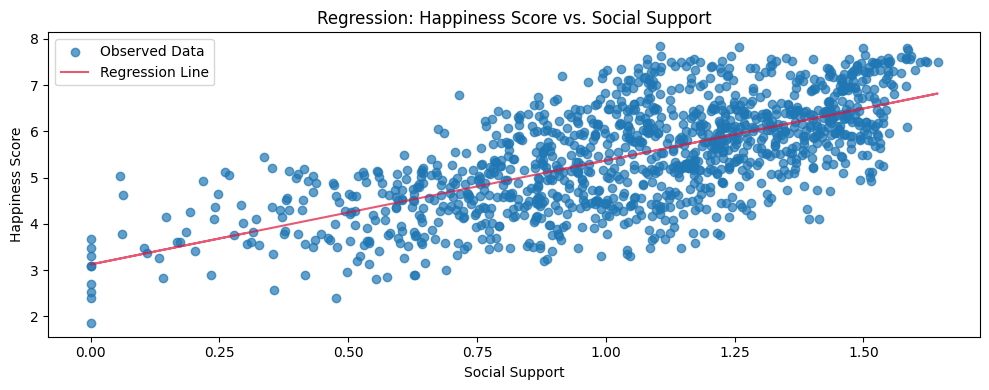

In [ ]:
from scipy.stats import linregress

# Regression: Happiness Score vs. Social Support

# Predictor and response
x = happy['social_support']
y = happy['happiness_score']

# Fit regression
slope, intercept, r_value, p_value, _ = linregress(x, y)

# Print regression results and correlation
print('Correlation coefficient: {:.3f}'.format(x.corr(y)))
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.3f}')
print(f'P-value: {p_value:.4e}')

# Regression line for plotting
reg_line = intercept + slope * x

# Plot
plt.figure(figsize=(10, 4))
plt.title('Regression: Happiness Score vs. Social Support')
plt.scatter(x, y, alpha=0.7, label='Observed Data')
plt.plot(x, reg_line, color='crimson', alpha=0.7, label='Regression Line')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

### Regression: Happiness Score vs. Life Expectancy
The relationship remains positive though, compared to the previous (0.790), it's a bit lower now (0.703). Life expectancy is defined as the average number of years a person is expected to have a healthy live at birth. The impact of this variable on the happines score, measured through R-squared, is relatively low (0.494). This is different from the behavior observed in the previous dataset, where a high R-squared of 0.625 suggested that life expectancy explained a substantial portion of the variance in happiness.

**Key statistics:**

- Correlation coefficient: 0.703, indicating a strong positive relationship.

- R² score: relatively low (0.494).

- P-value: Very low, confirming statistical significance.

Correlation coefficient: 0.703
Slope: 3.2665
Intercept: 3.58
R-squared: 0.494
P-value: 9.1929e-184


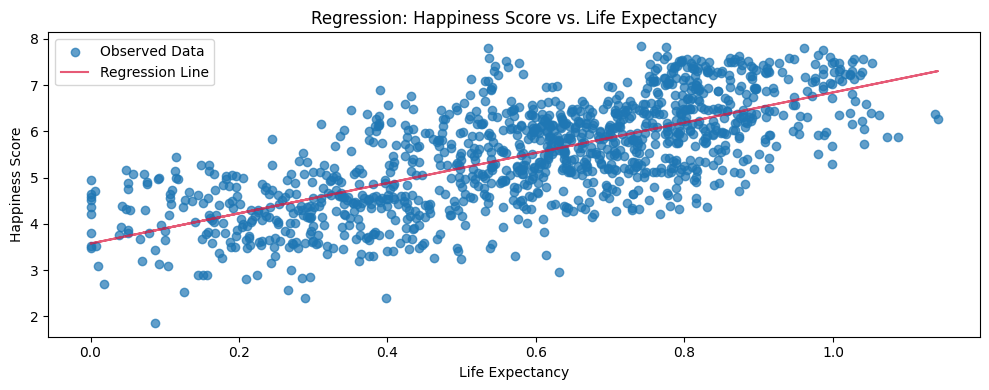

In [ ]:
# Regression: Happiness Score vs. Life Expectancy

# Predictor and response
x = happy['life_exp']
y = happy['happiness_score']

# Fit regression
slope, intercept, r_value, p_value, _ = linregress(x, y)

# Print regression results and correlation
print('Correlation coefficient: {:.3f}'.format(x.corr(y)))
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.3f}')
print(f'P-value: {p_value:.4e}')

# Regression line for plotting
reg_line = intercept + slope * x

# Plot
plt.figure(figsize=(10, 4))
plt.title('Regression: Happiness Score vs. Life Expectancy')
plt.scatter(x, y, alpha=0.7, label='Observed Data')
plt.plot(x, reg_line, color='crimson', alpha=0.7, label='Regression Line')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

### Regression: Happiness Score vs. GDP per Capita
GDP per capita reflects the average economic output per person and is a standard indicator of national wealth. The regression results show that the feature has some explanatory power (R-squared: 0.547). The positive relationship remains —the correlation coefficient for this new dataset is slightly lower, going from 0.754 (previous) to 0.740 (current).

**Key features:**

- Correlation coefficient: 0.740

- R² score: Moderate (0.547), indicating some explanatory power.

- P-value: Statistically significant.

Correlation coefficient: 0.740
Slope: 1.8599
Intercept: 3.58
R-squared: 0.547
P-value: 1.4875e-213


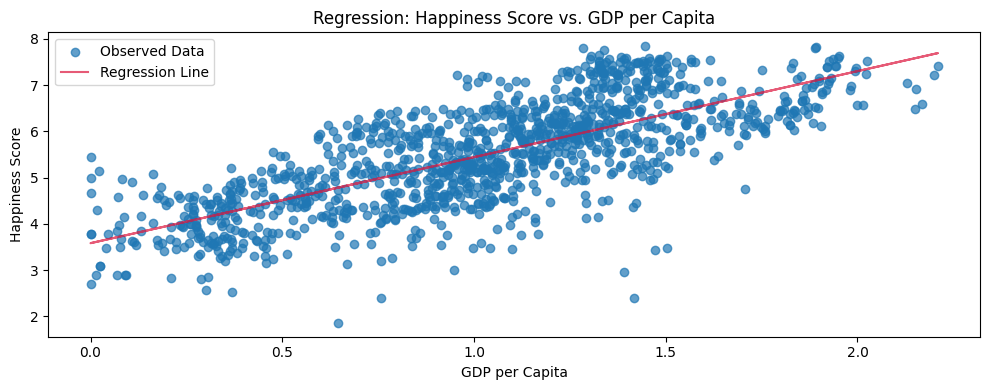

In [ ]:
# Regression: Happiness Score vs. GDP per Capita

# Predictor and response
x = happy['gdp_per_cap']
y = happy['happiness_score']

# Fit regression
slope, intercept, r_value, p_value, _ = linregress(x, y)

# Print regression results and correlation
print('Correlation coefficient: {:.3f}'.format(x.corr(y)))
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.3f}')
print(f'P-value: {p_value:.4e}')

# Regression line for plotting
reg_line = intercept + slope * x

# Plot
plt.figure(figsize=(10, 4))
plt.title('Regression: Happiness Score vs. GDP per Capita')
plt.scatter(x, y, alpha=0.7, label='Observed Data')
plt.plot(x, reg_line, color='crimson', alpha=0.7, label='Regression Line')
plt.xlabel('GDP per Capita' )
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

## Regression using top correlated features
Although the variance-explanation capabilities of the three top-correlated features have shifted compared to the previous dataset, the same modeling approach will be applied here. The presence of additional data and its transformation may have revealed new characteristics worth testing.

**R-squared summary**

| Feature          | R-squared (current) | R-squared (previous) |
|------------------|---------------------|----------------------|
| GDP per Capita   | 0.547               | 0.568                |
| Social Support   | 0.434               | 0.705                |
| Life Expectancy  | 0.494               | 0.625                |

The performance of the model run on the top-correlated features from the new dataset, measured with the r-squared value, is 0.6730 —lower than the previous one (0.7643).

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# Features and target
X = happy[['social_support', 'gdp_per_cap', 'life_exp']]
y = happy['happiness_score']

# train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Model instantiation and fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and model performance
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

print(f'r2 score: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

r2 score: 0.6730
MAE: 0.5094
RMSE: 0.6347


## Lasso regression for feature importance
Lasso regression is applied again to select the most relevant features. Although techniques like linear and logarithmic scaling were previously used, standard scaling will be applied again to ensure all features are treated equally. This step enhances the performance of the Lasso regression.

After scaling the input data, the model revealed social support, life expectancy, GDP per capita, and freedom as the most influential predictors, as occurred with the previous modelling. The difference now is that all the features have a positive impact on the happiness score, as showed by the correlation coefficients and scatterplots.

After re-fitting a standard linear regression with the Lasso-informed features, an enhanced performance of 0.7364 was observed —though lower than the previous model performance (0.8022).

Gdp Per Cap: 0.3119
Social Support: 0.1035
Life Exp: 0.2492
Freedom: 0.0867
Generosity: 0.0000
Corruption: 0.0000


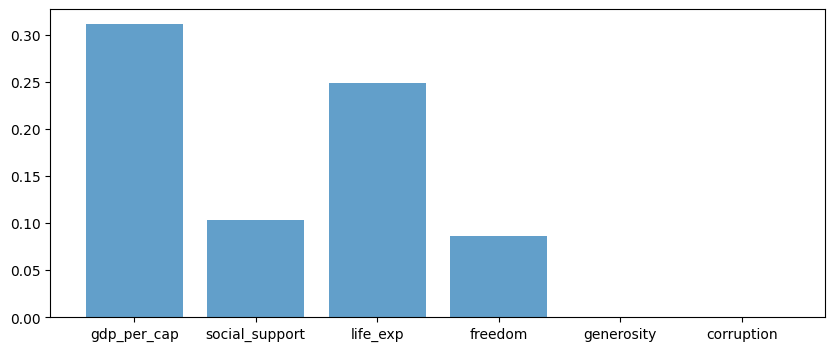

In [17]:
# Scale the data and run a Lasso regression on the entire dataset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Features and target
X = happy.drop(['country', 'happiness_score', 'year', 'region'], axis=1)
y = happy['happiness_score']

# train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Fit the scaler to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Use the fitted scaler to transform both feature sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert it back to dataframes for readability and consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### Running the Lasso model ###

# Model instantiation and fitting
model = Lasso(alpha=0.3)
model.fit(X_train_scaled, y_train)

# Compute and print the coefficients
lasso_coef = model.fit(X_train_scaled, y_train).coef_
for feature, coef in zip(X.columns, lasso_coef):
  print(f'{feature.replace("_", " ").title()}: {coef:.4f}')
plt.figure(figsize=(10, 4))
plt.bar(X.columns, lasso_coef, alpha=0.7)
plt.show()

In [20]:
# Run the regression again including one more feature: freedom

# Features and target
X = happy[['social_support', 'gdp_per_cap', 'life_exp', 'freedom']]
y = happy['happiness_score']

# train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Model instantiation and fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and model performance
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

print(f'r2 score: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

r2 score: 0.7364
MAE: 0.4471
RMSE: 0.5698


## Residual plot
As seen before, the residuals met these conditions:
- The residuals appear evenly scattered around the horizontal line at zero, with no clear curvature or funnel shape.
- The model does not exhibit strong nonlinearity or heteroscedasticity.

The fit can be considered good.

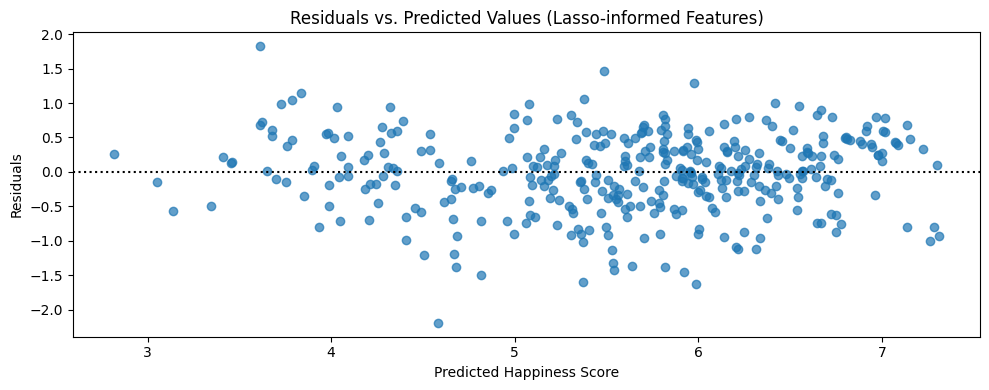

In [21]:
# Residuals
residuals = y_test - predictions

# Simple scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 4))
plt.scatter(predictions, residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle=':')
plt.xlabel('Predicted Happiness Score')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Lasso-informed Features)')
plt.tight_layout()
plt.show()

### Feature Scaling and Normalization: A Quick Overview
Normalization and scaling are preprocessing techniques used to standardize the range and distribution of numerical features. These steps are especially important for algorithms sensitive to feature magnitudes, such as Lasso regression and KNN.

- **Normalization**

Transforms features to a bounded range, typically [0, 1]

Formula: $$x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)}$$

Common when using proportion-like variables or when visual consistency is needed across indicators with vastly different units.

- **Standard Scaling**

Transforms features to have mean = 0 and standard deviation = 1

Formula: $$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$

Essential for models with regularization (e.g. Lasso, Ridge) to ensure fair coefficient penalization.

Enables better interpretability of model weights by equalizing unit effects.

## Regression with all the features
A slightly improvement results from the model trained on all the features. The r-squared is 0.7459.

In [19]:
# Run the regression with all the features

# Features and target
X = happy.drop(['country', 'year', 'region', 'happiness_score'], axis=1) # Target leakage!!!
y = happy['happiness_score']

# train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Model instantiation and fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and model performance
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

print(f'r2 score: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

r2 score: 0.7459
MAE: 0.4288
RMSE: 0.5595


## Conclusion on the modeling techniques used
Modeling the happiness score using the newly scaled dataset shows a similar tendency toward improvement as observed with the previous dataset. However, the performance metrics are lower this time. The inclusion of new information and transformed features may have uncovered underlying patterns that could enhance model generalizability, even though its capacity to explain variance has slightly diminished. By following the same feature-selection structure as before and observing similar behavior, the usefulness of the new data is affirmed, underscoring the importance of having more comprehensive information. This conclusion aligns with the widely accepted principle that a larger, more informative sample tends to improve generalization.

**R-squared evolution**

| Technique        | Current Modeling    | Previous Modeling    |
|------------------|---------------------|----------------------|
| Top-correlated   | 0.6730              | 0.7643               |
| Lasso-informed   | 0.7364              | 0.8026               |
| All Features     | 0.7459              | 0.8022               |

Although the previous dataset contains less information, its predictive power is greater and cannot be entirely disregarded. Since it was trained on a subset of more recent data, it may capture underlying patterns that better reflect short-term shifts in perceptions of happiness.

# Non-linear regressors

## Decision tree regressor
As before, the performance of this model reflects a moderate ability to capture the relationships between the variables and happiness scores.

**Model Performance (depth = 3)**

- R² score: 0.6460, lower than the previous model (0.7385)

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Select features and target
X = happy[['social_support', 'gdp_per_cap', 'life_exp', 'freedom']]
y = happy['happiness_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the model
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions and performance
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

# Print results
print(f"r2 score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

r2 score: 0.6460
MAE: 0.5209
RMSE: 0.6604


## Random forest regressor
This model keeps showing a good performance, even higher than all the linear models run so far.

**Model performance (n_estimators=100, depth=5)**
- R² score: 0.7741, slightly lower than the previous model (0.7941).

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Features and target
X = happy[['social_support', 'gdp_per_cap', 'life_exp', 'freedom']]
y = happy['happiness_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

# Output results
print(f"r2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

r2 Score: 0.7741
MAE: 0.4141
RMSE: 0.5276


## Model comparison
Here, it is more evident that the Random Forest regressor is the model with the strongest predictive power. The distribution of R-squared values for this model is left-skewed—as shown both visually and through central tendency measures—and also has the highest median. This result aligns with the previous observation, although in that case, the forest model only slightly outperformed the linear regressor.

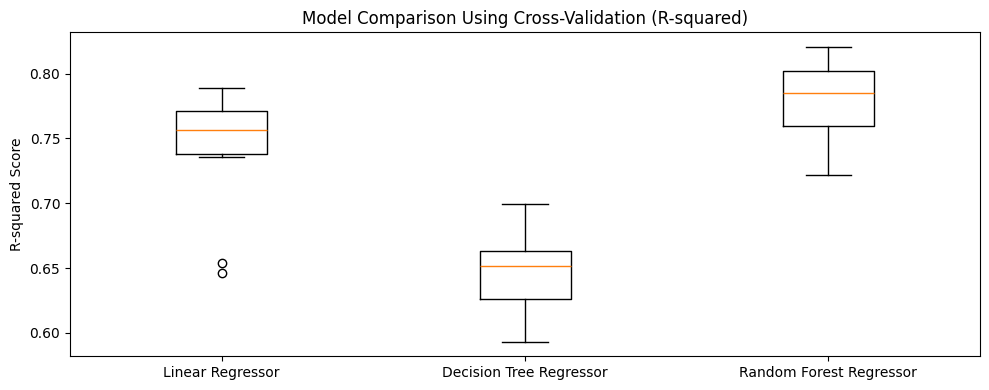

In [26]:
from sklearn.model_selection import cross_val_score, KFold
# Model comparison

# Features and target (Lasso-informed)
X = happy[['social_support', 'gdp_per_cap', 'life_exp', 'freedom']]
y = happy['happiness_score']

# Models
models = {
    'Linear Regressor': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=3, random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Dictionary to store the scores
scores = {}

# 10-split KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation
for name, model in models.items():
  cv_score = cross_val_score(model, X, y, cv=kf)
  scores[name] = cv_score

# Boxplot of the results
plt.figure(figsize=(10, 4))
plt.boxplot(scores.values(), tick_labels=scores.keys())
plt.title('Model Comparison Using Cross-Validation (R-squared)')
plt.ylabel('R-squared Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

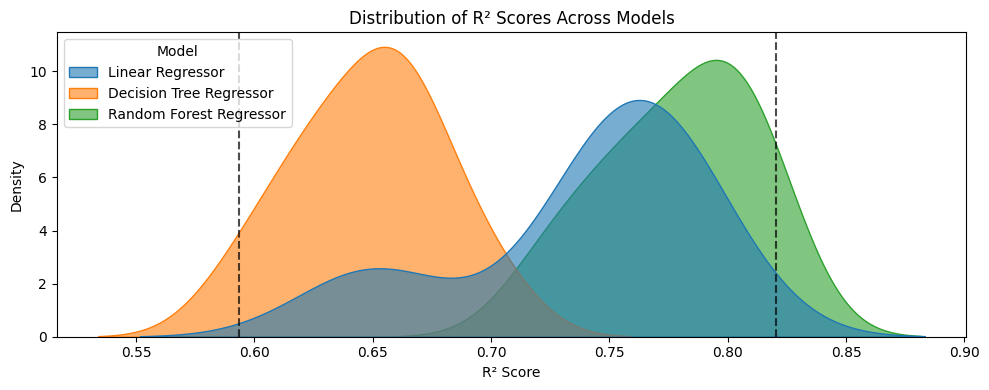

In [27]:
# KDE Plot of R² Distributions Across Models

# Convert dictionary of scores to DataFrame for plotting
scores_df = pd.DataFrame(scores)

# Melt the DataFrame for Seaborn compatibility
scores_melted = scores_df.melt(var_name='Model', value_name='R² Score')

# Plot KDEs
plt.figure(figsize=(10, 4))
sns.kdeplot(data=scores_melted, x='R² Score', hue='Model', fill=True, common_norm=False, alpha=0.6)
plt.title('Distribution of R² Scores Across Models')
plt.xlabel('R² Score')

# Min/max scores
r2_min = min(scores_melted['R² Score'])
r2_max = max(scores_melted['R² Score'])

for value in [r2_min, r2_max]:
    plt.axvline(x=value, color='black', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [30]:
# Central tendency measures
central = scores_melted.groupby('Model').agg({'R² Score': ['mean', 'median']})
print(central.round(3))

                        R² Score       
                            mean median
Model                                  
Decision Tree Regressor    0.648  0.651
Linear Regressor           0.740  0.757
Random Forest Regressor    0.779  0.785
